# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal
import os
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

## LPOU input

In [2]:
dt = 0.01
tot = 300
tAxis = np.arange(0,tot,dt)
# OU ; input
tau = 1
D = 1
OU=np.zeros(len(tAxis))
mu, sigma = 0, 1
for i in range(len(tAxis)-1):
    OU[i+1]=OU[i]*(1-dt/tau)+np.sqrt(D*dt)*np.random.normal(mu,sigma)
# filtering for OUSmoothed
Fc = 1
b, a = signal.butter(2, 2*Fc*dt, btype='low', analog=False)
LPOU = signal.filtfilt(b, a, OU)
LPOU = (LPOU-np.mean(LPOU))/np.std(LPOU)
x = LPOU

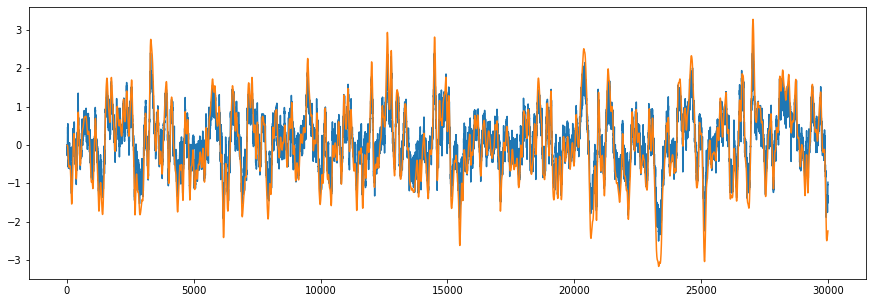

In [3]:
plt.plot(OU)
plt.plot(LPOU)

# plt.xlim(0, 100)
plt.gcf().set_size_inches(15,5)

In [4]:
pulseLen = 0.05
IPImean = 0.2

OSR = np.zeros_like(LPOU)
for i in range(int(tot/IPImean)):
    OSR[i*int(IPImean/dt):i*int(IPImean/dt)+int(pulseLen/dt)] = 1

# Time Code A
Sample every 200 ms

In [16]:
pulseLen = 0.05
IPImean = 0.2
IPIstd = 0.02

x = LPOU*0.02+0.2
x[np.where(x<pulseLen)] = pulseLen
x[np.where(x>2*IPImean-pulseLen)] = 2*IPImean-pulseLen

IPI_A = x[::int(IPImean/dt)]

TimeCodeA = np.zeros_like(LPOU)
downSampleStimulus_A = np.zeros_like(LPOU)
Start = 0
for ipi in IPI_A:
    TimeCodeA[Start:Start+int(pulseLen/dt)] = 1
    downSampleStimulus_A[Start:Start+int(ipi/dt+0.5)] = ipi
    Start += int(ipi/dt+0.5)
downSampleStimulus_A[Start:] = ipi

FM = TimeCodeA

# Time Code B
Sample by IPI(t)

In [6]:
pulseLen = 0.05
IPImean = 0.2
IPIstd = 0.02

x = LPOU*0.02+0.2
x[np.where(x<pulseLen)] = pulseLen
x[np.where(x>2*IPImean-pulseLen)] = 2*IPImean-pulseLen

IPI_B = []

TimeCodeB = np.zeros_like(LPOU)
downSampleStimulus_B = np.zeros_like(LPOU)
Start = 0
while Start<len(LPOU)-int(pulseLen/dt):
    TimeCodeB[Start:Start+int(pulseLen/dt)] = 1
    ipi = x[Start]
    IPI_B.append(ipi)
    downSampleStimulus_B[Start:Start+int(ipi/dt+0.5)] = ipi
    Start += int(ipi/dt+0.5)
downSampleStimulus_B[Start:] = ipi
IPI_B = np.array(IPI_B)

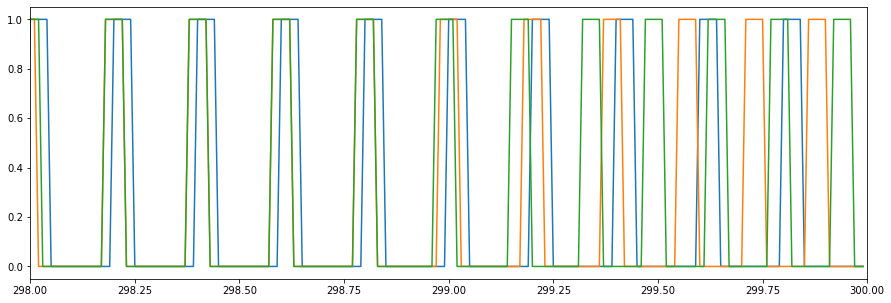

In [7]:
plt.plot(tAxis, OSR)
plt.plot(tAxis, TimeCodeA)
plt.plot(tAxis, TimeCodeB)

plt.xlim(298, 300)
plt.gcf().set_size_inches(15,5)

In [8]:
np.mean(IPI_A), np.mean(IPI_B)

(0.20001430494226943, 0.19797488964123094)

(array([ 15.,   6.,  14.,  13.,  42.,  88., 121., 152., 202., 196., 153.,
        174., 124.,  83.,  62.,  37.,  11.,  16.,   3.,   3.]),
 array([0.13675817, 0.14311383, 0.14946948, 0.15582513, 0.16218078,
        0.16853644, 0.17489209, 0.18124774, 0.18760339, 0.19395905,
        0.2003147 , 0.20667035, 0.21302601, 0.21938166, 0.22573731,
        0.23209296, 0.23844862, 0.24480427, 0.25115992, 0.25751557,
        0.26387123]),
 <BarContainer object of 20 artists>)

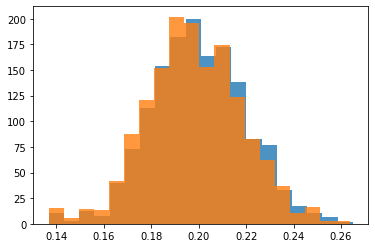

In [9]:
plt.hist(IPI_A, 20, alpha = 0.8)
plt.hist(IPI_B, 20, alpha = 0.8)

In [10]:
np.mean(downSampleStimulus_A), np.mean(downSampleStimulus_B)

(0.20203139310216175, 0.2000318453753316)

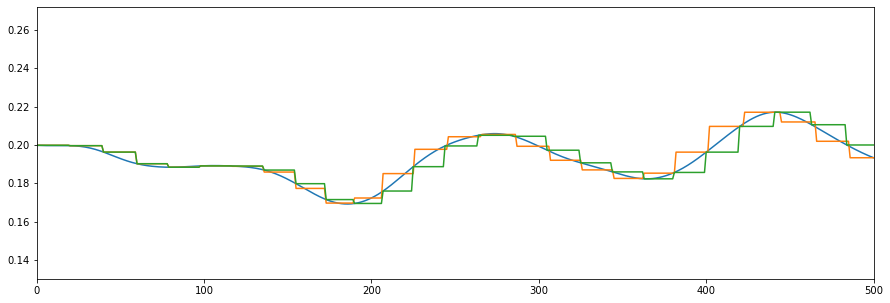

In [11]:
plt.plot(x)
plt.plot(downSampleStimulus_A)
plt.plot(downSampleStimulus_B)

plt.xlim(0, 500)
plt.gcf().set_size_inches(15,5)

(array([ 299.,  412., 2196., 4980., 7730., 6761., 4520., 2286.,  662.,
         154.]),
 array([0.13675817, 0.14946948, 0.16218078, 0.17489209, 0.18760339,
        0.2003147 , 0.21302601, 0.22573731, 0.23844862, 0.25115992,
        0.26387123]),
 <BarContainer object of 10 artists>)

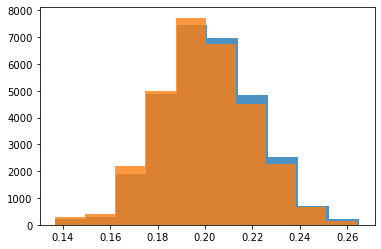

In [12]:
plt.hist(downSampleStimulus_A, alpha = 0.8)
plt.hist(downSampleStimulus_B, alpha = 0.8)


In [13]:
np.sum(TimeCodeA), np.sum(TimeCodeB)

(7495.0, 7575.0)

# FM
alike Time Code A but not accumalated

In [41]:
pulseLen = 0.05
IPImean = 0.2

FM = np.zeros_like(LPOU)
StartTime = np.append(0,IPI_A[:-1]-IPImean)+np.arange(0,tot,IPImean)
for st in StartTime:
    FM[int(st/dt):int(st/dt)+int(pulseLen/dt)] = 1

# AM

In [44]:
pulseLen = 0.05
IPImean = 0.2

AM = np.zeros_like(LPOU)
for i in range(int(tot/IPImean)):
    AM[i*int(IPImean/dt):i*int(IPImean/dt)+int(pulseLen/dt)] = IPImean/np.append(0,np.diff(StartTime))[i]

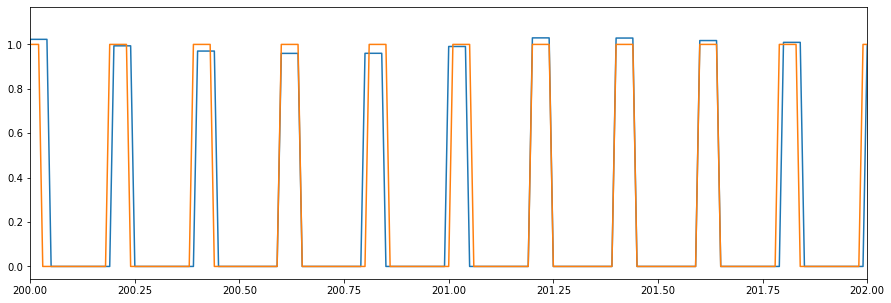

In [47]:
plt.plot(tAxis, AM)
plt.plot(tAxis, FM)

plt.xlim(200, 202)
plt.gcf().set_size_inches(15,5)

# Rate Code

In [ ]:
pulseLen = 0.05
IPImean = 0.2
IPIstd = 0.02

x = 1/(LPOU*0.02+0.2)

dutyCycle = pulseLen/IPImean